<a href="https://colab.research.google.com/github/harshvs4/YoLoV3/blob/main/YoLoV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/YoloV3.zip

!rm -rf /content/YoloV3/data/customdata

!unzip /content/gdrive/MyDrive/customdata.zip -d /content/YoloV3/data/

cp: cannot stat '/content/gdrive/MyDrive/weights': No such file or directory


In [4]:
!cp -r /content/gdrive/MyDrive/weights /content/YoloV3/

In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [5]:
ls

gdrive/  sample_data/  YoloV3/


In [6]:
cd YoloV3/

/content/YoloV3


In [7]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [8]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(epochs=3, batch_size=3, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-30 06:33:23.536191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 06:33:24.456786: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; 

In [9]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom1.cfg --epochs 100

Namespace(epochs=100, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom1.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=False, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-30 06:34:12.054163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 06:34:12.984206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or dir

In [10]:
!python detect.py --cfg cfg/yolov3-custom1.cfg --conf-thres 0.3 --output out_out

Namespace(cfg='cfg/yolov3-custom1.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/100 data/customdata/images/0ccd28106773295.Y3JvcCw0NTAwLDM1MTksMCwxNDQ.jpg: 448x512 1 flynns, Done. (0.040s)
image 2/100 data/customdata/images/18158eeb22b2235b7c04758f8ca5d1ad--pascal-tangled-tangled-rapunz

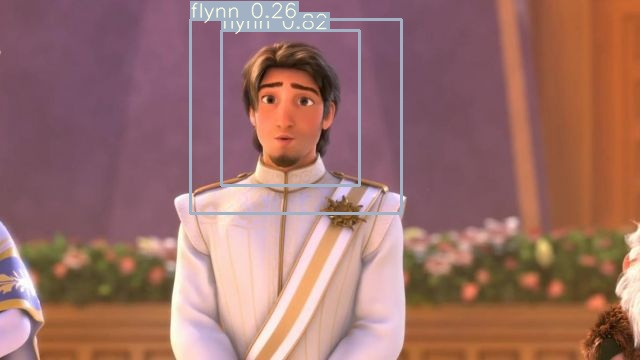

In [14]:
Image(filename='out_out/192309-1554814399.jpg', width=400)

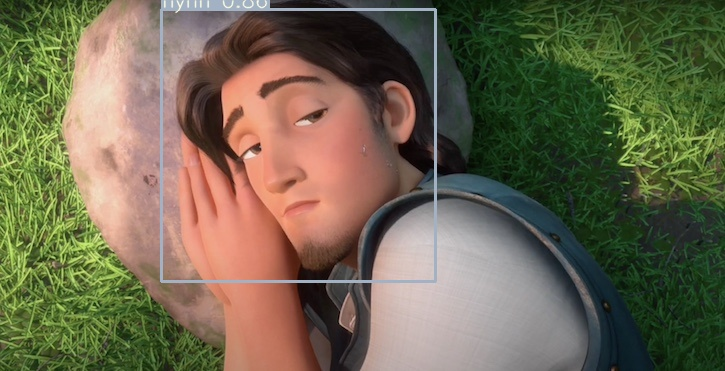

In [15]:
Image(filename='out_out/Flynn-resting-his-head-on-a-rcok-when-a-furious-Maximus-finds-him.jpg', width=300)

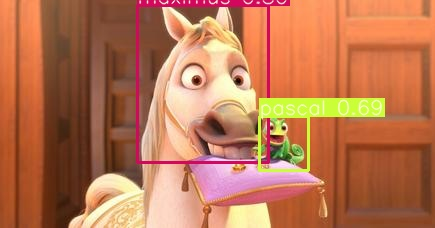

In [16]:
Image(filename='out_out/Maximus_with_Pascal.jpg', width=300)

In [17]:
!cp -r /content/YoloV3/out_out /content/gdrive/MyDrive/out_out